In [1]:
import sys; sys.path.insert(0, '..')
import dill as pickle
import numpy as np
import pandas as pd
import itertools
from ldf.best_subset import best_n_avg
from ldf.ldf import ldf
from scipy.stats import norm, multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":20,"axes.labelsize":20})
plt.rc('legend',fontsize=16)
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
%matplotlib inline

## All forecasts

In [64]:
## select uip_l1_save file for small model pool and full_save for the large model pool
log_lik = np.load(r"..//data//FX//full_save_loglik.npz")["x"]

In [23]:
np.log(np.exp(log_lik[:,120:]).mean(axis=0)).mean()

20.816408091004128

In [24]:
np.log(np.exp(log_lik[:,120:]).mean(axis=0)).sum()

5037.570758022999

## LDF

### Model averaging

In [25]:
c= 10**(-20)
discount_factors = np.array([1, 0.99, 0.95, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.001]) # np.linspace(0.2, 1.0, 81) # 

### 2-level LDF(softmax, argmax)

In [26]:
res_ldf = ldf(log_lik.astype(float), levels=2, discount_factors=[discount_factors, discount_factors], activation_functions=["softmax", "argmax"], c=c)
ldfa_df = pd.DataFrame([discount_factors, res_ldf["logscores"][:,-242:].mean(axis=1), res_ldf["logscores"][:,-242:].sum(axis=1)]).T
ldfa_df.style.format("{:.2f}")

,0,1,2
0,1.00,22.17,5364.58
1,0.99,22.20,5371.55
2,0.95,22.22,5377.08
3,0.90,22.24,5381.59
4,0.80,22.27,5389.48
5,0.70,22.32,5400.33
6,0.60,22.29,5393.53
7,0.50,22.33,5404.64
8,0.40,22.30,5397.81
9,0.30,22.28,5392.61


### 2-level LDF(softmax, softmax)

In [27]:
res_ldf = ldf(log_lik.astype(float), levels=2, discount_factors=[discount_factors, discount_factors], activation_functions=["softmax", "softmax"], c=c)
ldfs_df = pd.DataFrame([discount_factors, res_ldf["logscores"][:,-242:].mean(axis=1), res_ldf["logscores"][:,-242:].sum(axis=1)]).T
ldfs_df.style.format("{:.2f}")

,0,1,2
0,1.00,22.17,5365.09
1,0.99,22.20,5372.46
2,0.95,22.30,5396.55
3,0.90,22.36,5411.00
4,0.80,22.37,5413.55
5,0.70,22.35,5409.71
6,0.60,22.34,5405.90
7,0.50,22.32,5402.40
8,0.40,22.31,5399.38
9,0.30,22.30,5396.92


### 1-level LDF(softmax) (DMA)

In [28]:
res_dma = ldf(log_lik.astype(float), levels=1, discount_factors=[discount_factors], activation_functions=["softmax"], c=c)
res_dma_df = pd.DataFrame([discount_factors, res_dma["logscores"][:,-242:].mean(axis=1), res_dma["logscores"][:,-242:].sum(axis=1)]).T
res_dma_df.style.format("{:.2f}")

,0,1,2
0,1.00,21.91,5302.83
1,0.99,21.95,5310.96
2,0.95,22.07,5340.61
3,0.90,22.17,5366.03
4,0.80,22.22,5377.29
5,0.70,22.18,5367.38
6,0.60,22.12,5353.50
7,0.50,22.07,5340.68
8,0.40,22.02,5330.01
9,0.30,21.98,5319.95


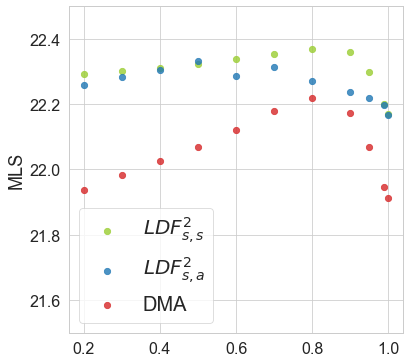

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(ldfs_df[0].to_list()[:-1], ldfs_df[1].to_list()[:-1], marker='o', color='yellowgreen', label="$LDF_{s, s}^2$", s=40, alpha=0.8)
ax.scatter(ldfa_df[0].to_list()[:-1], ldfa_df[1].to_list()[:-1], marker='o', color='tab:blue', label="$LDF_{s, a}^2$", s=40, alpha=0.8)
ax.scatter(res_dma_df[0].to_list()[:-1], res_dma_df[1].to_list()[:-1], marker='o', color='tab:red', label="DMA", s=40, alpha=0.8)
ax.set_ylabel(r"MLS")
ax.set_ylim(21.5, 22.5)
ax.legend(loc="lower left");

### Model selection

### 2-level LDF(argmax, argmax)

In [30]:
res_ldf = ldf(log_lik.astype(float), levels=2, discount_factors=[discount_factors, discount_factors], activation_functions=["argmax", "argmax"], c=c)
ldfa_df = pd.DataFrame([discount_factors, res_ldf["logscores"][:,-242:].mean(axis=1), res_ldf["logscores"][:,-242:].sum(axis=1)]).T
ldfa_df.style.format("{:.2f}")

,0,1,2
0,1.00,21.75,5263.83
1,0.99,21.75,5264.31
2,0.95,21.78,5270.54
3,0.90,21.80,5275.55
4,0.80,21.75,5263.94
5,0.70,21.73,5259.77
6,0.60,21.69,5249.46
7,0.50,21.68,5247.40
8,0.40,21.67,5243.91
9,0.30,21.69,5249.39


### 2-level LDF(argmax, softmax)

In [31]:
res_ldf = ldf(log_lik.astype(float), levels=2, discount_factors=[discount_factors, discount_factors], activation_functions=["argmax", "softmax"], c=c)
ldfs_df = pd.DataFrame([discount_factors, res_ldf["logscores"][:,-242:].mean(axis=1), res_ldf["logscores"][:,-242:].sum(axis=1)]).T
ldfs_df.style.format("{:.2f}")

,0,1,2
0,1.00,21.77,5268.73
1,0.99,21.84,5285.03
2,0.95,21.98,5319.99
3,0.90,22.03,5330.19
4,0.80,22.04,5332.49
5,0.70,22.03,5331.62
6,0.60,22.03,5330.61
7,0.50,22.03,5330.21
8,0.40,22.03,5330.32
9,0.30,22.03,5330.70


### 1-level LDF(argmax) (DML)

In [32]:
res_dml = ldf(log_lik.astype(float), levels=1, discount_factors=[discount_factors], activation_functions=["argmax"], c=c)
res_dml_df = pd.DataFrame([discount_factors, res_dml["logscores"][:,-242:].mean(axis=1), res_dml["logscores"][:,-242:].sum(axis=1)]).T
res_dml_df.style.format("{:.2f}")

,0,1,2
0,1.00,21.51,5206.41
1,0.99,21.54,5213.80
2,0.95,21.85,5287.76
3,0.90,21.81,5277.69
4,0.80,21.78,5269.78
5,0.70,21.77,5268.73
6,0.60,21.75,5264.34
7,0.50,21.80,5274.77
8,0.40,21.78,5270.94
9,0.30,21.81,5277.40


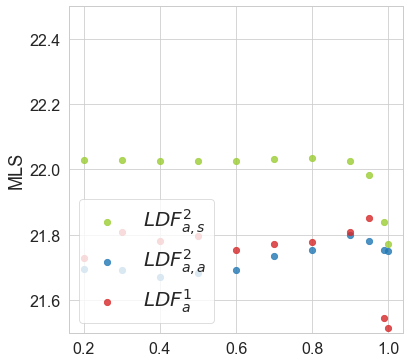

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(ldfs_df[0].to_list()[:-1], ldfs_df[1].to_list()[:-1], marker='o', color='yellowgreen', label="$LDF_{a, s}^2$", s=40, alpha=0.8)
ax.scatter(ldfa_df[0].to_list()[:-1], ldfa_df[1].to_list()[:-1], marker='o', color='tab:blue', label="$LDF_{a, a}^2$", s=40, alpha=0.8)
ax.scatter(res_dml_df[0].to_list()[:-1], res_dml_df[1].to_list()[:-1], marker='o', color='tab:red', label="$LDF_{a}^1$", s=40, alpha=0.8)
ax.set_ylabel(r"MLS")
ax.set_ylim(21.5, 22.5)
ax.legend(loc="lower left");

## BPS

In [34]:
bps_lik = np.load(r"..//data//BPS//loglik_fx_5000n.npy") #loglik_fx_5000n _95beta_delta

In [39]:
np.log(bps_lik.mean(axis=1)).mean()

21.601505312629726

In [40]:
np.log(bps_lik.mean(axis=1)).sum()

5227.564285656394

In [41]:
y_ret = pd.read_excel(r"..//data//FX//Y.xlsx")

## 2-level LDS vs BPS for a single currency pair

In [55]:
log_lik = np.load(r"D:\dev\ldf\data\FX\uip_l1_save_loglik.npz")["x"]
means = np.load(r"D:\dev\ldf\data\FX\uip_l1_save_means.npz")["x"]
covariance= np.load(r"D:\dev\ldf\data\FX\uip_l1_save_covariance.npz")["x"]

In [56]:
res_ldf = ldf(log_lik.astype(float), levels=2, discount_factors=[discount_factors, discount_factors], activation_functions=["softmax", "softmax"], c=c)
ldfs_df = pd.DataFrame([discount_factors, res_ldf["logscores"][:,-242:].mean(axis=1), res_ldf["logscores"][:,-242:].sum(axis=1)]).T
ldfs_df.style.format("{:.2f}")

,0,1,2
0,1.00,22.04,5334.40
1,0.99,22.08,5342.20
2,0.95,22.13,5355.42
3,0.90,22.16,5362.06
4,0.80,22.15,5359.58
5,0.70,22.13,5354.71
6,0.60,22.11,5350.92
7,0.50,22.10,5348.05
8,0.40,22.09,5345.82
9,0.30,22.08,5344.05


#### Calculate mean prediction for gaussian mixture and the quantiles

In [57]:
# Return the smallest value x between lo and hi such that f(x) >= v
def continuous_bisect_fun_left(f, v, lo, hi):
    val_range = [lo, hi]
    k = 0.5 * sum(val_range)
    for i in range(32):
        val_range[int(f(k) > v)] = k
        next_k = 0.5 * sum(val_range)
        if next_k == k:
            break
        k = next_k
    return k

def get_mixture_cdf(component_distributions, ps):
    return lambda x: sum(component_dist.cdf(x) * p for component_dist, p in zip(component_distributions, ps))

# Return the pth quantile of the mixture distribution given by the component distributions and their probabilities
def mixture_quantile(p, component_distributions, ps):
    mixture_cdf = get_mixture_cdf(component_distributions, ps)

    # We can probably be a bit smarter about how we pick the limits
    lo = np.min([dist.ppf(p) for dist in component_distributions])
    hi = np.max([dist.ppf(p) for dist in component_distributions])

    return continuous_bisect_fun_left(mixture_cdf, p, lo, hi)

In [58]:
weights = res_ldf["weights"][3, -242:, :]

In [59]:
component_distributions = []
for i in range(weights.shape[0]):
    component_distributions.append([norm(loc=means[j, 120+i, -1], scale=np.sqrt(covariance[j, 120+i, -1, -1])) for j in range(weights.shape[1])])

In [60]:
qs = []
for i in range(weights.shape[0]):
    qs.append([mixture_quantile(0.05, component_distributions[i], weights[i,:]), mixture_quantile(0.95, component_distributions[i], weights[i,:])])
qs = np.asarray(qs)

In [61]:
ldf_s_s_2_pred = (means[:, -242:, -1] * weights.T).sum(axis=0)

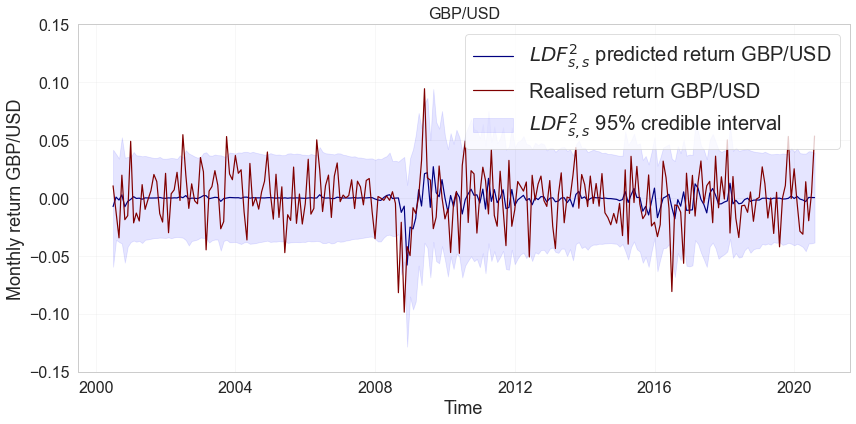

In [63]:
ccy = "GBP"
ccy_idx = 8
pair = f'{ccy}/USD'
time = y_ret["Unnamed: 0"][126:]
burnin = 127
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(time, ldf_s_s_2_pred, c='navy', label=r'$LDF_{s,s}^2$ predicted return ' + f"{pair}")
ax.plot(time, y_ret["GBP"][126:], c='maroon', label=f'Realised return {pair}')
ax.fill_between(time, qs[:,0], qs[:,1], 
                color='blue', alpha=0.1, label='$LDF_{s,s}^2$ 95% credible interval')

ax.set_ylim(-0.15, 0.15)
ax.set_title(f'{pair}')
ax.legend(loc='upper right')
ax.set_xlabel('Time')
ax.set_ylabel(f'Monthly return {pair}')
ax.grid(alpha=0.2, which='major', c='lightgrey')
fig.tight_layout() 
plt.show()